<a href="https://colab.research.google.com/github/asepmuhidin/research/blob/master/Data_Visualisasi_Dasar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisasi Data Dasar
### Created : Asep Muhidin, UPB 2023 
## Sumber Materi : https://taudata.blogspot.com/2022/04/eda-02.html

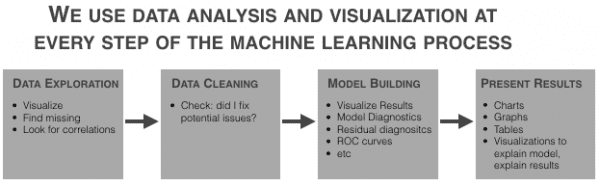

## Image Source
https://www.sharpsightlabs.com/blog/data-analysis-machine-learning-example-1/

## Data Visualitation Graph

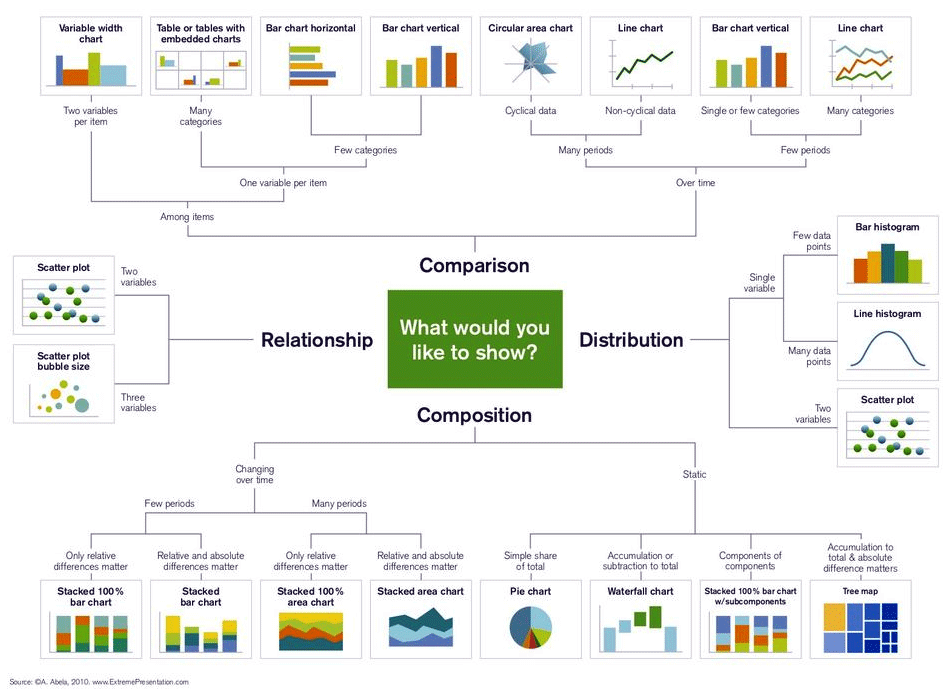

## Data Visualizations catalogue

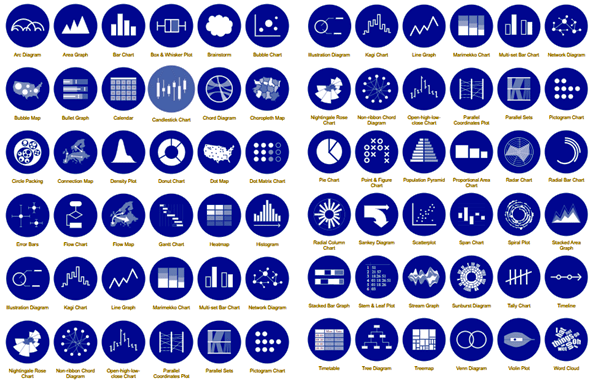

## Sumber Gambar :  https://datavizcatalogue.com/

# Import Library

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

# Data Load

In [ ]:
file="https://raw.githubusercontent.com/asepmuhidin/research/master/price.csv"
price = pd.read_csv(file)
price.drop("Observation", axis=1, inplace=True)
price.drop_duplicates(inplace=True)
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price2 = price[np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())]
price2.info()

# Statistika Deskriptif

In [ ]:
# Statistika Sederhana dari data "Numerik"-nya
price2.describe(include='all').transpose()

## Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe tempat parkir?

In [ ]:
p= sns.catplot(x="Parking", y="House_Price", data=price2)
# Apa yang bisa dilihat dari hasil ini?

# Tambah dimensi di Visualisasi untuk melihat insight yang lebih jelas/baik 

In [ ]:
# Bisa juga plot dengan informasi dari 3 variabel sekaligus
# (untuk melihat kemungkinan faktor interaksi)
p= sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="swarm", data=price2)

# Ada informasi apakah dari hasil diatas?

In [ ]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="Parking", data=price2)

# Adding labels? ... Hhhmmm...

In [ ]:
def groupedbarplot(df, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(df.columns, pos):
        bars.append(ax.bar(np.arange(len(df))+x, df[col].values, width=w, **kw))
        # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
        for val, xi in zip(df[col].values, np.arange(len(df))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2), 
                            textcoords="offset points",
                            ha="center", va="bottom")
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index)
    return bars

In [ ]:
counts = price2.groupby(["Parking", "City_Category"]).size().unstack()
plt.figure(figsize=(12,8))
groupedbarplot(counts)
plt.show()

In [ ]:
price2.groupby(["Parking", "City_Category"]).size().unstack()

# Horizontal? Why?

In [ ]:
ax = sns.countplot(y = 'Parking', hue = 'City_Category', palette = 'muted', data=price2)

In [ ]:
tips=sns.load_dataset('tips')
categorical = tips.select_dtypes(include = ['category']).columns
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=tips[variable], ax=subplot)

# Stacked/Segmented Chart

In [ ]:
CT = pd.crosstab(index=price2["City_Category"], columns=price2["Parking"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

In [ ]:
# ini dilakukan jika kita ingin menyimpan plotnya ke dalam suatu file
p.figure.savefig('barChart.png')
# lihat di folder ipynb-nya akan muncul file baru.

# Mosaic Plot for multiple categorical data analysis

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

p = mosaic(tips, ['sex','smoker','time'])

In [ ]:
# PieChart
plot = price2.City_Category.value_counts().plot(kind='pie')

# Show Values?

In [ ]:
data = price2['Parking']

proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
colors = ['r', 'g', 'b', 'y']
labels = proporsion.keys()
explode = (0.2, 0, 0, 0)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Proporsi Tipe Parkir')
plt.legend(labels,loc='best')
plt.show()

In [ ]:
# Jika ada outlier grafiknya menjadi tidak jelas (data = price, bukan price2)
p = sns.boxplot(x="House_Price", y="Parking", data=price)

In [ ]:
# BoxPlots
p = sns.boxplot(x="House_Price", y="Parking", data=price2)
# Apa makna pola yang terlihat di data oleh BoxPlot ini?

# Boxplot dapat juga dipisahkan berdasarkan suatu kategori

In [ ]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

* Ada dugaan/interpretasi (baru) apakah dari boxPlot diatas?
* Sebutkan beberapa kelemahan (PitFalls) Box Plot?

# Swarn Plot & Violin Plot

In [ ]:
p= sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

In [ ]:
p = sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

In [ ]:
col = 'House_Price'
plot = sns.displot(data=price2, x=col, kde=True)

In [ ]:
plot = sns.displot(data=price2, x=col, hue='Parking', kind="kde")

In [ ]:
numerical = price2.select_dtypes(include = ['int64','float64']).columns

price2[numerical].hist(figsize=(15, 6), layout=(2, 4));

In [ ]:
p = sns.scatterplot(x=price2['House_Price'], y=price2['Dist_Market'], hue = price2['Parking'])

# Joined

In [ ]:
p = sns.jointplot(x=price2['House_Price'], y=price2['Rainfall'])

# Conditional Plot

In [ ]:
cond_plot = sns.FacetGrid(data=price2, col='Parking', hue='City_Category')#, hue_order=["Yes", "No"]
p = cond_plot.map(sns.scatterplot, 'Dist_Hospital', 'House_Price').add_legend()